# Fuzzy Logic

In [ ]:
!pip install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in /usr/local/lib/python3.6/dist-packages (0.4.2)


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

Creating the inputs (antecedents) and outputs (consequents)

In [ ]:
# Examiner can score between 1-25
examiner1 = ctrl.Antecedent(np.arange(0, 26, 1), 'Examiner1')
examiner2 = ctrl.Antecedent(np.arange(0, 26, 1), 'Examiner2')

# final grade is between 1-50
grade = ctrl.Consequent(np.arange(0, 51, 1), 'grade')

Setting the membership function

In [ ]:
# Consider A system of 2 Examiner and these examiner can grade each student from 5 different avaliable grade.

examiner1.automf(5, names=["bad", "average", "good", "very good", "excellent"])
examiner2.automf(5, names=["bad", "average", "good", "very good", "excellent"])
#Grade code
grade.automf(5, names=["F", "P", "B", "A", "O"])

Plotting the membership functions of the inputs and outputs

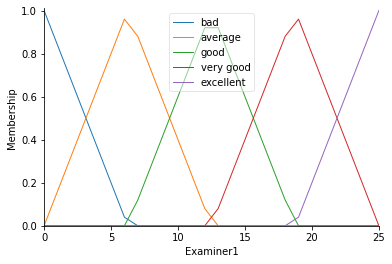

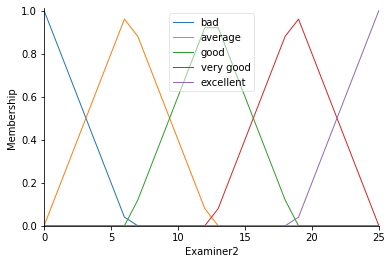

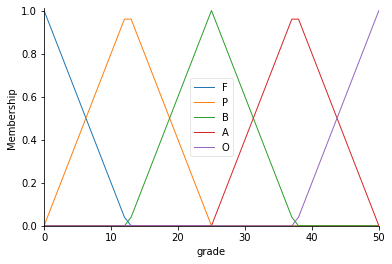

In [ ]:
examiner1.view()
examiner2.view()
grade.view()

Creating the inference rules

In [ ]:
rules = [] #dictonary which will contain  different rules.

rules.append(ctrl.Rule(examiner1['bad'] & examiner2['bad'], grade['F']))
rules.append(ctrl.Rule((examiner1['bad'] & examiner2['average']) | (examiner1['average'] & examiner2['bad']), grade['F']))
rules.append(ctrl.Rule((examiner1['bad'] & examiner2['good']) | (examiner1['good'] & examiner2['bad']), grade['P']))
rules.append(ctrl.Rule((examiner1['bad'] & examiner2['very good']) | (examiner1['very good'] & examiner2['bad']), grade['P']))
rules.append(ctrl.Rule((examiner1['bad'] & examiner2['excellent']) | (examiner1['excellent'] & examiner2['bad']), grade['B']))
rules.append(ctrl.Rule(examiner1['average'] & examiner2['average'], grade['P']))
rules.append(ctrl.Rule((examiner1['average'] & examiner2['good']) | (examiner1['good'] & examiner2['average']), grade['B']))
rules.append(ctrl.Rule((examiner1['average'] & examiner2['very good']) | (examiner1['very good'] & examiner2['average']), grade['B']))
rules.append(ctrl.Rule((examiner1['average'] & examiner2['excellent']) | (examiner1['excellent'] & examiner2['average']), grade['A']))
rules.append(ctrl.Rule(examiner1['good'] & examiner2['good'], grade['B']))
rules.append(ctrl.Rule((examiner1['good'] & examiner2['very good']) | (examiner1['very good'] & examiner2['good']), grade['A']))
rules.append(ctrl.Rule((examiner1['good'] & examiner2['excellent']) | (examiner1['excellent'] & examiner2['good']), grade['A']))
rules.append(ctrl.Rule(examiner1['very good'] & examiner2['very good'], grade['A']))
rules.append(ctrl.Rule((examiner1['very good'] & examiner2['excellent']) | (examiner1['excellent'] & examiner2['very good']), grade['O']))
rules.append(ctrl.Rule(examiner1['excellent'] & examiner2['excellent'], grade['O']))

Creating a control system and simulation

In [ ]:
gradeControl = ctrl.ControlSystem(rules)
gradingSystem = ctrl.ControlSystemSimulation(gradeControl)

Running 50 simulations

In [ ]:
for i in range(50):
    examiner1 = np.random.uniform(1, 25)
    examiner2 = np.random.uniform(1, 25)
    
    gradingSystem.inputs({
        "Examiner1": examiner1,
        "Examiner2": examiner2
    })

    gradingSystem.compute()
    print("Test Case No: {} - 1st Examiner Score: {:.3f}, 2nd Examiner Score: {:.3f},  Final result: {:.2f} / 50".format(i+1, examiner1, examiner2, gradingSystem.output["grade"]))

Test Case No: 1 - 1st Examiner Score: 6.745, 2nd Examiner Score: 1.948,  Final result: 11.76 / 50
Test Case No: 2 - 1st Examiner Score: 11.566, 2nd Examiner Score: 3.348,  Final result: 18.95 / 50
Test Case No: 3 - 1st Examiner Score: 24.168, 2nd Examiner Score: 13.658,  Final result: 37.71 / 50
Test Case No: 4 - 1st Examiner Score: 4.452, 2nd Examiner Score: 18.386,  Final result: 21.25 / 50
Test Case No: 5 - 1st Examiner Score: 15.713, 2nd Examiner Score: 6.754,  Final result: 26.69 / 50
Test Case No: 6 - 1st Examiner Score: 22.968, 2nd Examiner Score: 16.926,  Final result: 40.36 / 50
Test Case No: 7 - 1st Examiner Score: 21.366, 2nd Examiner Score: 17.228,  Final result: 38.54 / 50
Test Case No: 8 - 1st Examiner Score: 12.918, 2nd Examiner Score: 11.338,  Final result: 26.16 / 50
Test Case No: 9 - 1st Examiner Score: 16.964, 2nd Examiner Score: 21.364,  Final result: 38.53 / 50
Test Case No: 10 - 1st Examiner Score: 18.761, 2nd Examiner Score: 21.636,  Final result: 38.77 / 50
Test

Viewing the graph for the 50th simulation

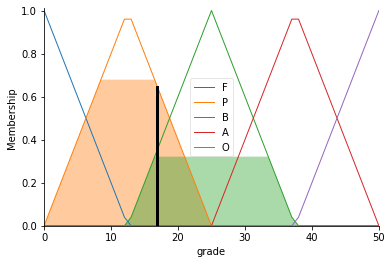

In [ ]:
grade.view(sim=gradingSystem)